# Sheet 4 Exercise 2: Nonlinear Decision Network (Credits: 6)
Note: The notebook contains all problems parts of the second exercise. Please create the plots that are asked for in the notebook and type out the corresponding interpretations. All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

Consider a network consisting of two linear threshold neurons that inhibit each other. The inhibition strength is given by the parameter $c$, and the firing threshold by $\theta$. Together with respective input signals $s_1$ and $s_2$, the model is governed by the nonlinear differential equations
$$
\begin{align}
\tau \dot{u}_1(t) = - u_1 (t) - c[u_2 - \theta]_+ + s_1, \\
\tau \dot{u}_2(t) = - u_2 (t) - c[u_1 - \theta]_+ + s_2.
\end{align}
$$
The linear threshold function is defined by $[x]_+ := \max\{x,0\}$.

#### 2.1
Show that the network can be reparameterized in the standard form
$$
\begin{align}
\dot{\tilde{u}}_1(\tilde{t}) = - \tilde{u}_1 (\tilde{t}) - c[\tilde{u}_2(\tilde{t})]_+ + \tilde{s}_1, \\
\dot{\tilde{u}}_2(\tilde{t}) = - \tilde{u}_2 (\tilde{t}) - c[\tilde{u}_1(\tilde{t})]_+ + \tilde{s}_2.
\end{align}
$$

In the following, we drop the tildes and simply consider the standard form. Assume $c = 2$ and $s_1 = s_2 = 1$ (as written in the standard form).

1) Consider $u_i - \theta \rightarrow u_i$. This will not change the derivative but add an additional term to $s_i$

$$ \tau \dot{u_i}(t) = -u_i(t) - c[u_j]_{+} + s_1 + \theta $$ 

2) Consider Consider $t' = t/\tau$, 

$$\Rightarrow \frac{du_i}{dt'} = \frac{du_i/dt}{dt'/dt} = \tau\frac{du_i}{dt}$$

$$ \Rightarrow \dot{u_i}(t') = -u_i(t') - c[u_j(t')]_+ + s_i + \theta,$$

#### 2.2
The system can now be written as 

$$
\dot{u} = - u - c\begin{pmatrix} 0&1\\1&0 \end{pmatrix}[u]_+ + s.
$$

Plot the vector field of the dynamical system as a quiver plot. What does the plot tell you about the dynamics of the system?

In [166]:
import numpy as np
import matplotlib.pyplot as plt

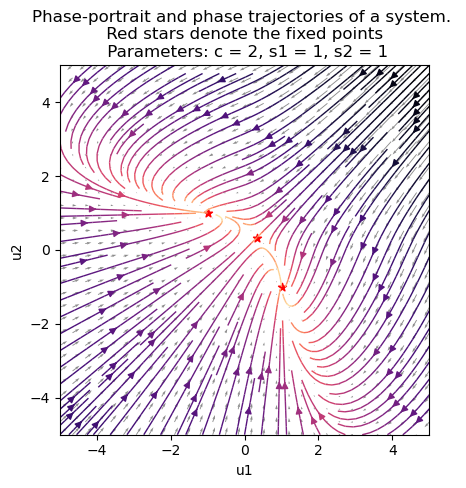

In [163]:
### CODE FOR YOUR PLOTS HERE ###

c = 2
s1, s2 = 1, 1

default_args = (c, s1, s2)

def get_du(u, args=(c, s1, s2), nonlinearity='relu'):
    """
    Input:
        u: shape (2, 1) (column-vector)
        args: (c, s1, s2) - parameters for the system
        nonlinearity: 'relu': max(0, x) or 'step': int(x > 0)
    Returns:
        du: a derivative column vector
    """
    c, s1, s2 = args
    u_nonlinear = np.zeros((2, 1))
    if nonlinearity == 'relu':
        u_nonlinear = np.maximum(np.zeros((2, 1)), u)
    if nonlinearity == 'step':
        u_nonlinear = (np.zeros((2, 1)) < u).astype(int)
    recurrent_matrix = np.array([[0, 1], [1, 0]]) @ u_nonlinear
    du = -u - c * recurrent_matrix + np.array([s1, s2]).reshape((2, 1))
    return du


def get_vector_field(u1_span=(-5, 5), u2_span=(-5, 5), n_points=50, args=default_args, nonlinearity='relu'):
    u1_grid = np.linspace(*u1_span, n_points)
    u2_grid = np.linspace(*u2_span, n_points)
    u1_mesh, u2_mesh = np.meshgrid(u1_grid, u2_grid)
    vector_field = np.zeros((2, n_points, n_points))
    for i in range(n_points):
        for j in range(n_points):  
            u = np.array([u1_mesh[i, j], u2_mesh[i, j]]).reshape((2, 1))
            vector_field[:, i, j] = get_du(u, args, nonlinearity).flatten()
            
    return u1_grid, u2_grid, vector_field    
    

def get_fixed_points(args):
    """
    Finds fixed points of a dynamical system in four quadrants according to the analytical solution
    Returns a set of points for a scatter plot in a format [(u1, u2), (u1, u2), ...]
    """
    c, s1, s2 = args
    
    
    p1 = np.array([c / (c ** 2 - 1) * (s2 - s1 * c) + s1, (s2 - s1 * c) / (1 - c ** 2)])
    p2 = np.array([-c * s2 + s1, s2])
    p3 = np.array([s1, s2])
    p4 = np.array([s1, -c * s1 + s2])
    
    quadrants = np.array([[+1, +1], [+1, -1], 
                          [-1, +1], [-1, -1]])
    points = np.array([p1, p4, 
                       p2, p3])
    
    fixed_points = np.array([p for p, q in zip(points, quadrants) if np.prod(p * q >= 0)])

    return fixed_points
    
    

scale = 5
args = (2, 1, 1)

u1, u2, vf = get_vector_field((-scale, scale), (-scale, scale), n_points=30, args=args)
fixed_points = get_fixed_points(args)
plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)
plt.scatter(*fixed_points.T, c='red', marker='*')

plt.xlabel("u1")
plt.ylabel("u2")

plt.gca().set_aspect('equal')

c, s1, s2 = args
plt.title(f"Phase-portrait and phase trajectories of a system. \n Red stars denote the fixed points \n Parameters: c = {c}, s1 = {s1}, s2 = {s2}");
### CODE FOR YOUR PLOTS HERE ###

**Interpretation:** 

- The quiver plot along side with flow visualization allows to see the dynamics of the system starting from different points in the phase space
- The given system with recurrently inhibitory neurons has two stable nodes and one saddle.
- That is, the system is bistable, and which node will prevale is dependent on the initial conditions. Which neuron was the most active initially, will also be more active in a corresponding stable node
- With a high activity of both neurons, the system stabilizes itself going in the direction of (0, 0)
- With a low activity of both neurons the same thing happends
- It can also be seen that with one neuron being two inactive, the flow will turn to the direction of increasing activity of this neuron

#### 2.3
Note that inside any of the four quadrants, the linear threshold function is linear in both $u_1$ and $u_2$. Thus the whole system is piecewise linear. Compute the fixed points inside each quadrant by treating the system as a linear system restricted on each quadrant seperately, namely
1. $u_1$, $u_2 > 0$,
2. $u_1 > 0$, $u_2 \leq 0$,
3. $u_1 \leq 0$, $u_2 > 0$,
4. $u_1$, $u_2 \leq 0$.

Analyze the stability of the fixed points by computing the eigenvalues of the system matrix for each quadrant. How do the results relate to the plot observed in 2.2?

*Hint:* Note that the dynamics within a given quadrant may have fixed points *outside* of this quadrant. Of course, these are not relevant for us as different quadrants are governed by different dynamics.

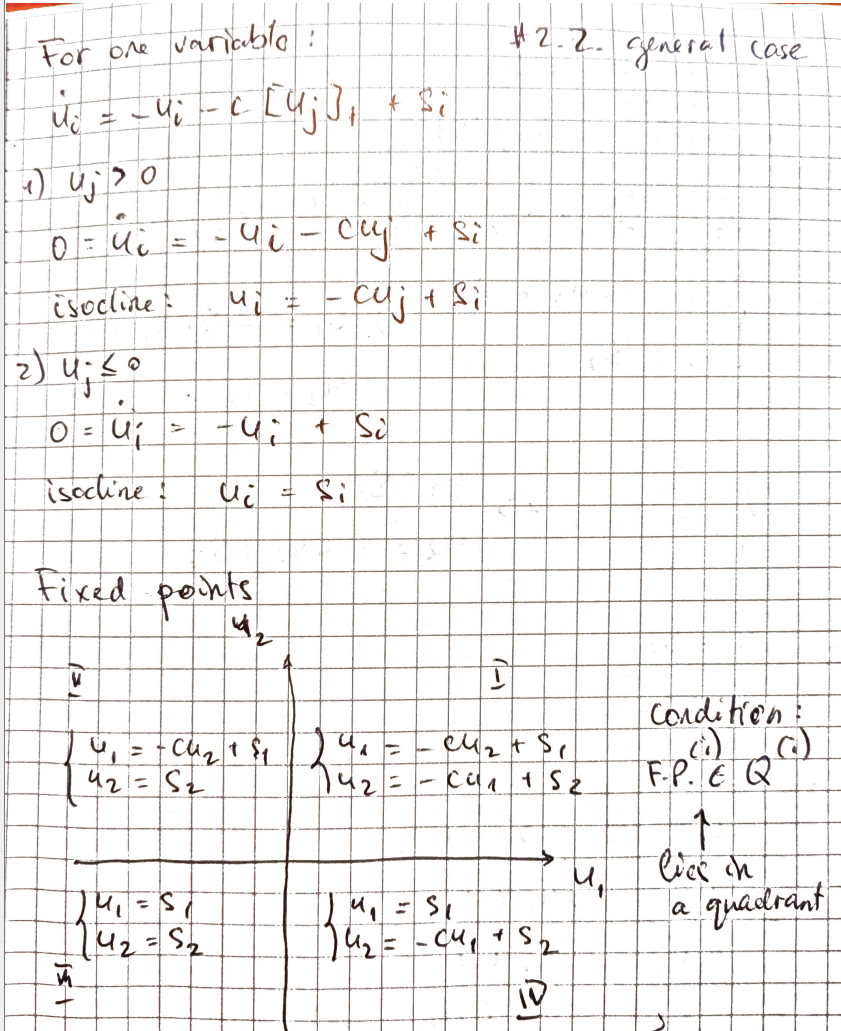

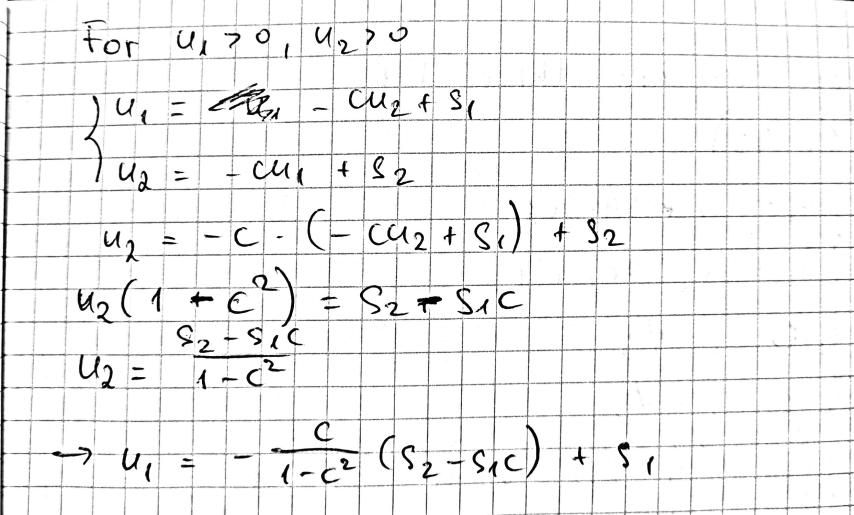

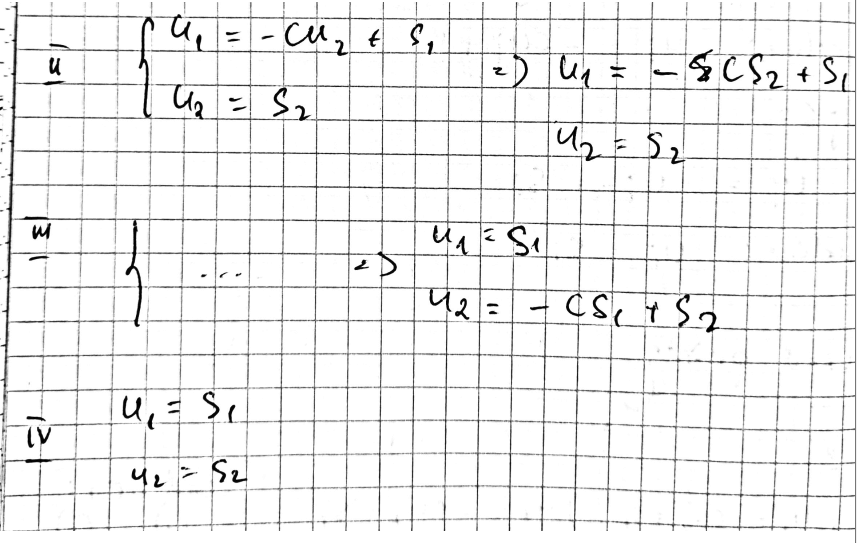

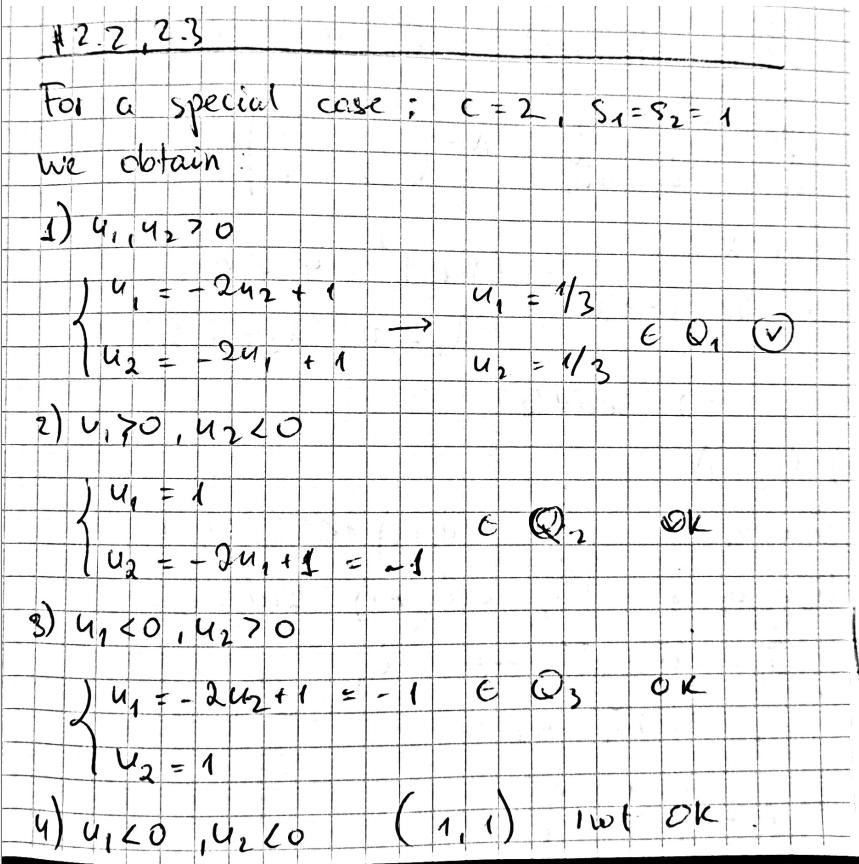

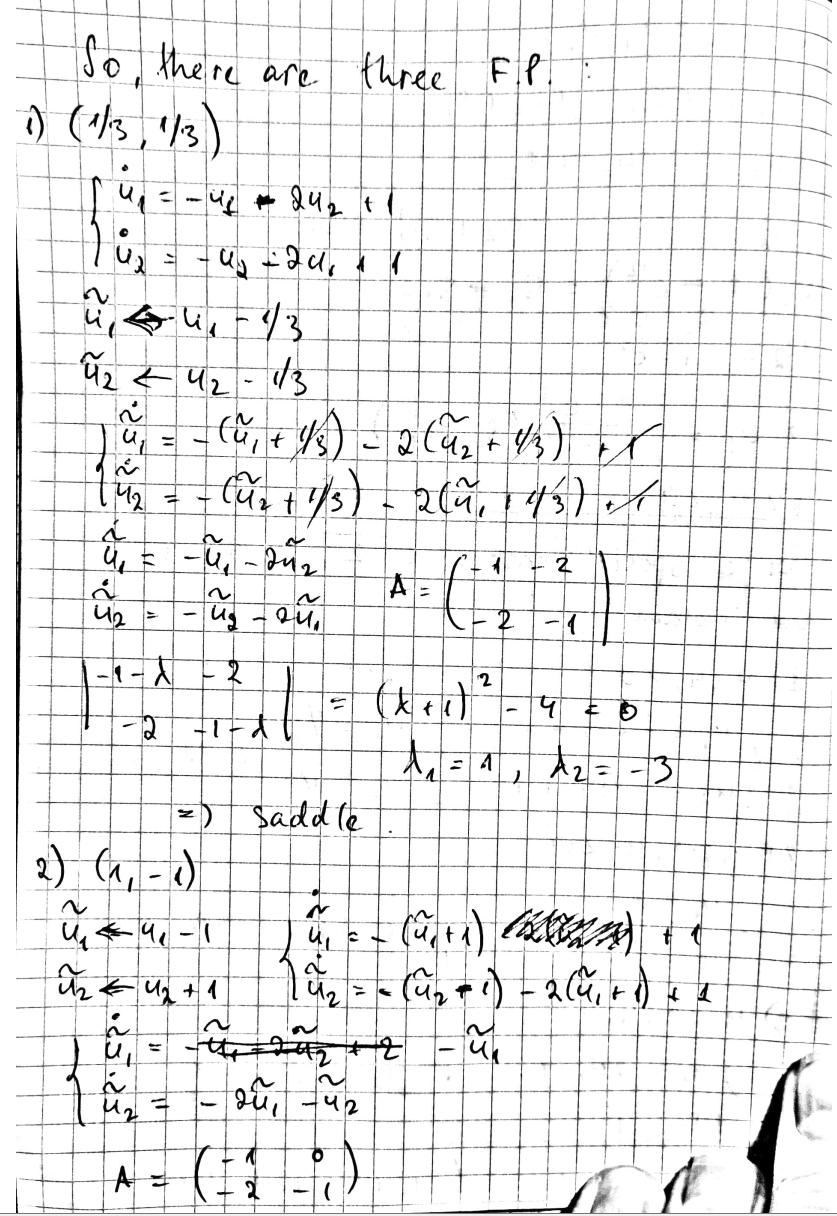

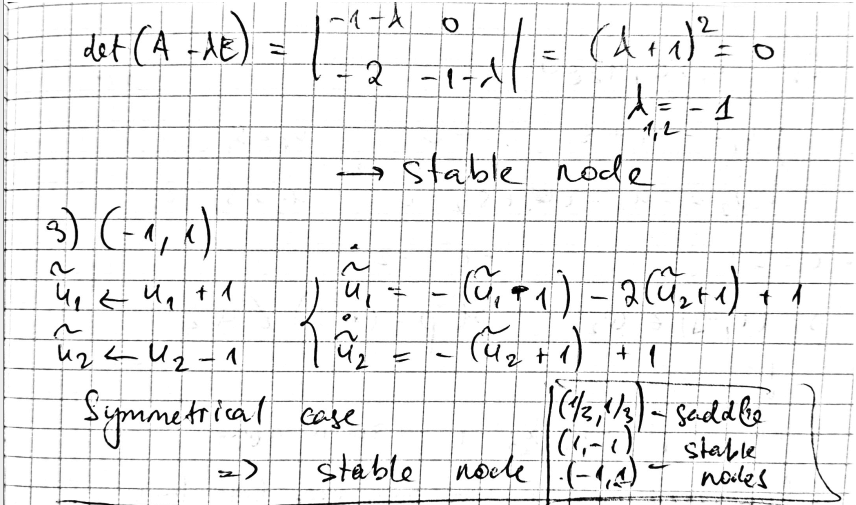

**Explanation:** 

Already explained in the previous pointed and prooved with a pen and paper analysis

#### 2.4
Consider asymmetrical inputs, namely
1. $s_1 = 1.5$, $s_2 = 1$,
2. $s_1 = 1$, $s_2 = 1.5$.

Using quiver and stream plots, analyze the (asymptotical) behaviour of the system for the initial conditions $(0,0)$, $(1,-1)$ and $(-1,1)$.

How do you interpret the behaviour in terms of neural decision mechanisms based on inputs $s_1$ and $s_2$?

*Hint:* The documentation for stream plots can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html. They are created in the same way as quiver plots and conveniently visualize the system's flow.

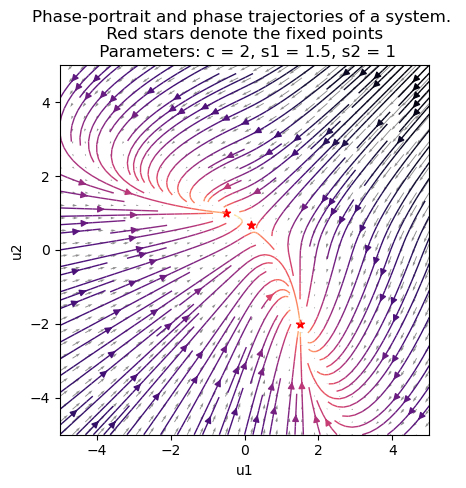

In [158]:
### CODE FOR YOUR PLOTS HERE ###
scale = 5
args = (2, 1.5, 1)

u1, u2, vf = get_vector_field((-scale, scale), (-scale, scale), n_points=30, args=args)
fixed_points = get_fixed_points(args)
plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)
plt.scatter(*fixed_points.T, c='red', marker='*')

plt.xlabel("u1")
plt.ylabel("u2")

plt.gca().set_aspect('equal')

c, s1, s2 = args
plt.title(f"Phase-portrait and phase trajectories of a system. \n Red stars denote the fixed points \n Parameters: c = {c}, s1 = {s1}, s2 = {s2}");

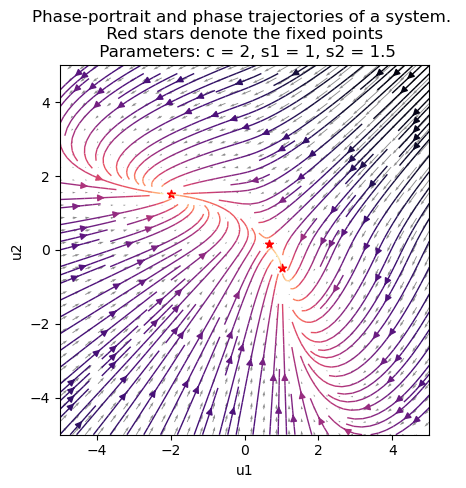

In [150]:
### CODE FOR YOUR PLOTS HERE ###

scale = 5
args = (2, 1, 1.5)

u1, u2, vf = get_vector_field((-scale, scale), (-scale, scale), n_points=30, args=args)
fixed_points = get_fixed_points(args)
plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)
plt.scatter(*fixed_points.T, c='red', marker='*')

plt.xlabel("u1")
plt.ylabel("u2")

plt.gca().set_aspect('equal')

c, s1, s2 = args
plt.title(f"Phase-portrait and phase trajectories of a system. \n Red stars denote the fixed points \n Parameters: c = {c}, s1 = {s1}, s2 = {s2}");

### CODE FOR YOUR PLOTS HERE ###

**Interpretation:** 

Changing the ratio of inputs to the neuron does not change the phase portrait qualitetively - there is the same amount of fixed points of the same types (although with further increase of input current bifurcations can be observed).

However, quantitatively the balance shifts to the stimulated neuron. It's corresponding stable point corresponds to higher activity of the stimulated neuron, as well as the "decision boundary" of the opposing basins of attractions shifts towards the basin of a node corresponding to higher activity of the stimulated neuron. 

#### 2.5
Now set $s_1=s_2=1$, $c=-2$. Plot again the vector field. How you you explain the behaviour? In particular, how do you explain the result when taking into account the system matrix' eigenvalues?

fixed points:  []


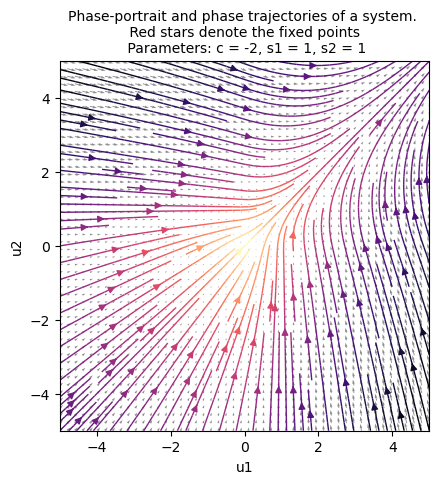

In [167]:
### CODE FOR YOUR PLOTS HERE ###

scale = 5
args = (-2, 1, 1)

u1, u2, vf = get_vector_field((-scale, scale), (-scale, scale), n_points=50, args=args)
fixed_points = get_fixed_points(args)
print("fixed points: ", fixed_points)
plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)
#plt.scatter(*fixed_points.T, c='red', marker='*')

plt.xlabel("u1")
plt.ylabel("u2")

plt.gca().set_aspect('equal')

c, s1, s2 = args
plt.title(f"Phase-portrait and phase trajectories of a system. \n Red stars denote the fixed points \n Parameters: c = {c}, s1 = {s1}, s2 = {s2}", fontsize=10);

### CODE FOR YOUR PLOTS HERE ###

**Explanation:** 

With changing the inhibition to excitation fixed points disappear completely. That is why it is unreasonable to mention the eigenvalues of the system, as they are only relevant in the vicinity of fixed points. 

This behavior of the system can be explained with a fact that net excitation is larger than self-inhibition of the neuron and the dynamics of the system explodes being unbalanced by inhibitory forces. Instead of a negative feedback loop in the previous cases, positive feedback loop does not allow the system to settle and stabilize. 

#### 2.6
Replace the linear threshold function $[\cdot]_+$ by a step treshold function given by
$$
1(x) = \begin{cases} 0, & x \leq 0  \\ 1, & x > 0\end{cases}.
$$

Set $s_1=s_2=1$. Analyze the fixed points and eigenvalues for each quadrant like in 2.3 for $c=2$ and $c=-2$.

Plot the vector fields. Can you explain the difference in the the system's behaviour with a linear threshold and
with a step threshold function?

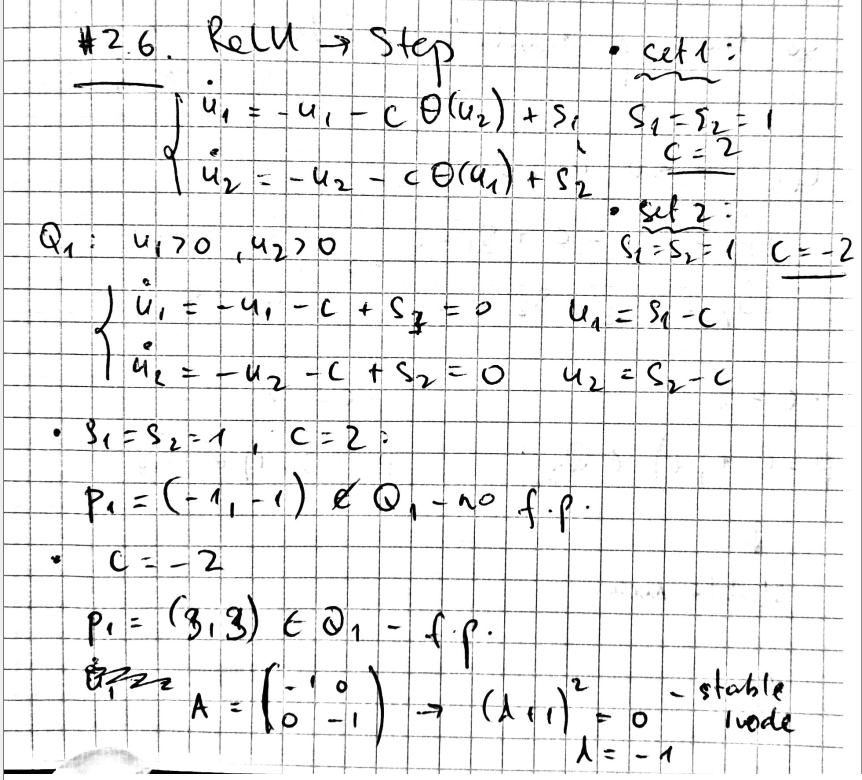

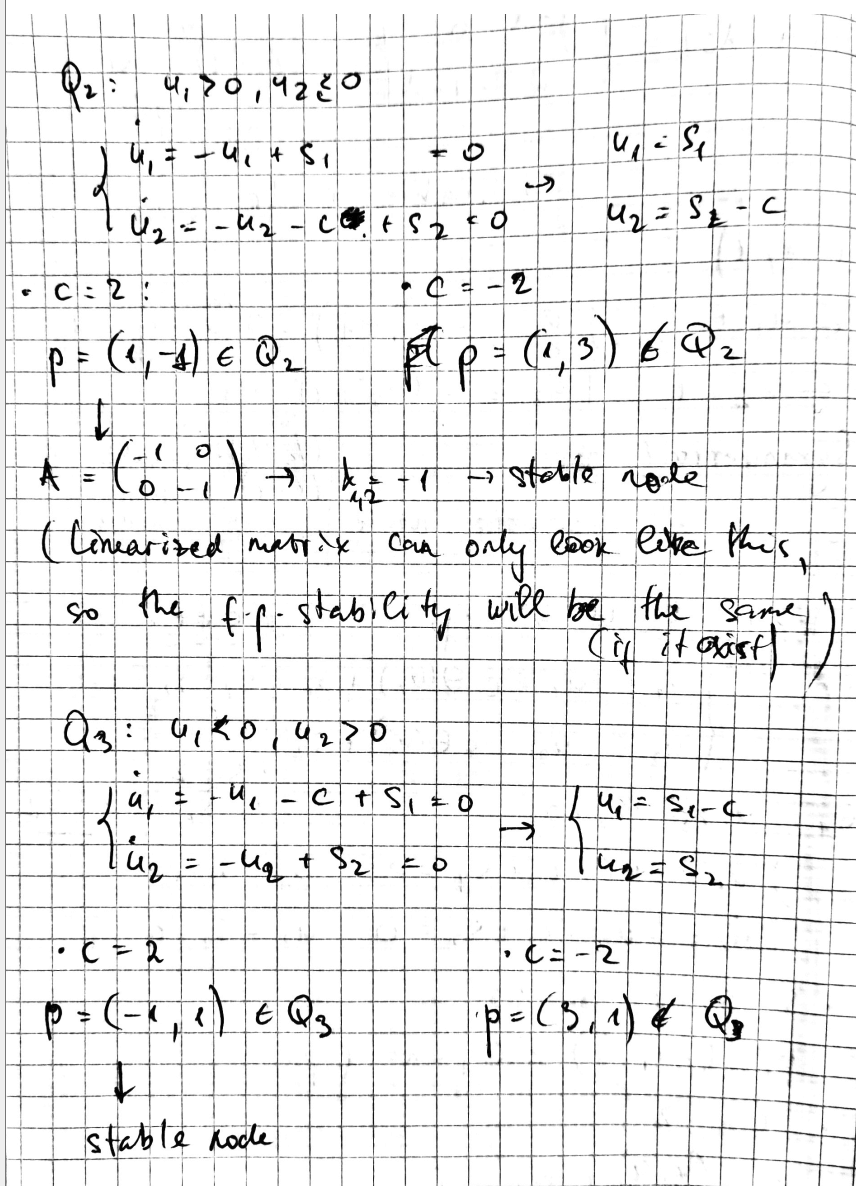

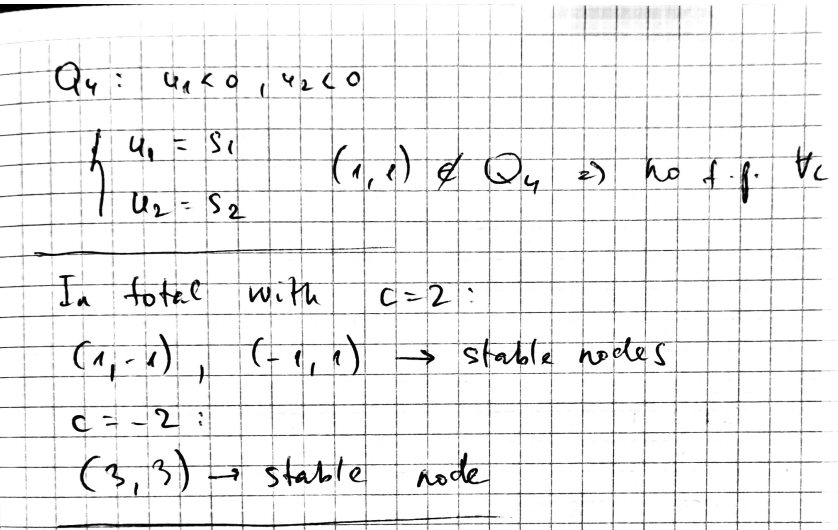

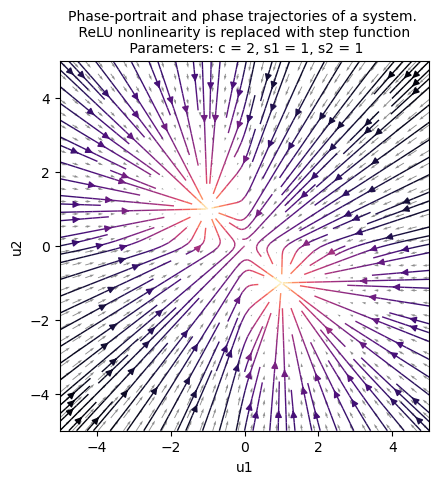

In [164]:
### CODE FOR YOUR PLOTS HERE ###

args = (2, 1, 1)

u1, u2, vf = get_vector_field((-scale, scale), (-scale, scale), n_points=30, args=args, nonlinearity='step')

plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)
#plt.scatter(*fixed_points.T, c='red', marker='*')

plt.xlabel("u1")
plt.ylabel("u2")

plt.gca().set_aspect('equal')

c, s1, s2 = args
plt.title(f"Phase-portrait and phase trajectories of a system. \n ReLU nonlinearity is replaced with step function \n Parameters: c = {c}, s1 = {s1}, s2 = {s2}", fontsize=10);

### CODE FOR YOUR PLOTS HERE ###


### CODE FOR YOUR PLOTS HERE ###

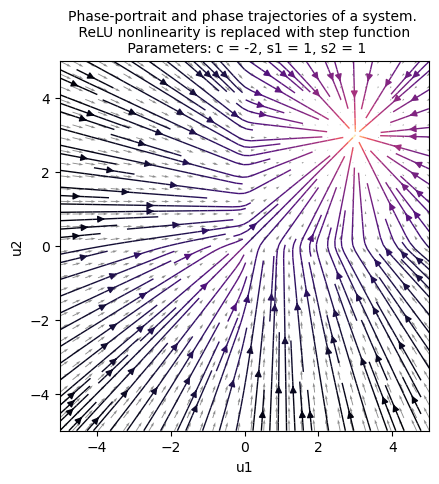

In [165]:
### CODE FOR YOUR PLOTS HERE ###

args = (-2, 1, 1)

u1, u2, vf = get_vector_field((-scale, scale), (-scale, scale), n_points=30, args=args, nonlinearity='step')

plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)
#plt.scatter(*fixed_points.T, c='red', marker='*')

plt.xlabel("u1")
plt.ylabel("u2")

plt.gca().set_aspect('equal')

c, s1, s2 = args
plt.title(f"Phase-portrait and phase trajectories of a system. \n ReLU nonlinearity is replaced with step function \n Parameters: c = {c}, s1 = {s1}, s2 = {s2}", fontsize=10);

### CODE FOR YOUR PLOTS HERE ###


### CODE FOR YOUR PLOTS HERE ###

**Explanation:** 

- With a step activation function on inhibitory recurrent inputs the picture is qualitatively the same as in the case of ReLU. There are still two basins of attraction and the system is still exhibiting a self-regulatory behavior. 
- With the excitatory inputs everywhere exept the (+, +) quadrant the system behaves the same way. In this quadrant, however, the artifact inhibitory force starts to appear, not allowing the activity to increase to infinity. While the connections are still exitatory, the strength of exitation is fixed to a number and with $u_j > 1$ this "fake" ihibition start to play role eventually stabilizing the system at a stable node (3, 3). 

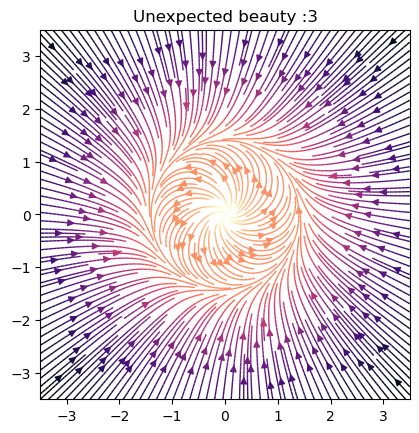

In [177]:
def get_dx(x, args):
    c, s1, s2 = args
    x1, x2 = x.flatten()
    dx1 = -x2 - x1 * (x1**2+x2**2-c) + s1
    dx2 = +x1 - x2 * (x1**2+x2**2-c) + s2
    return np.array([dx1, dx2]).reshape(-1, 1)


def get_dx_vector_field(u1_span=(-5, 5), u2_span=(-5, 5), n_points=50, args=default_args):
    u1_grid = np.linspace(*u1_span, n_points)
    u2_grid = np.linspace(*u2_span, n_points)
    u1_mesh, u2_mesh = np.meshgrid(u1_grid, u2_grid)
    vector_field = np.zeros((2, n_points, n_points))
    for i in range(n_points):
        for j in range(n_points):  
            u = np.array([u1_mesh[i, j], u2_mesh[i, j]]).reshape((2, 1))
            vector_field[:, i, j] = get_dx(u, args).flatten()
            
    return u1_grid, u2_grid, vector_field


plt.gca().set_aspect('equal')

args = (7, 1, 1)
scale = 3.5
u1, u2, vf = get_dx_vector_field((-scale, scale), (-scale, scale), n_points=30, args=(2, 0, 0))
#plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.title("Unexpected beauty :3")
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=3, linewidth=1);
